In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1a-sTBUhBEP-nIcLlxDJWGs0nmfAjS3Dl'})
fileDownloaded2 = drive.CreateFile({'id':'1MeEWzUMXOv_be1W0XLf-pqhM_tHAvNuH'})
fileDownloaded.GetContentFile('pulsars_test_set')
fileDownloaded2.GetContentFile('pulsars_train_set')

In [ ]:
df1 = pd.read_csv('pulsars_test_set')
df1.tail(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12633,106.875000,47.571328,0.199440,0.284964,3.079431,20.984455,8.427475,78.259366,0
12634,133.820312,43.478161,0.136691,0.353121,0.982441,9.486068,18.528395,444.411748,0
12635,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
12636,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
12637,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
12638,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
12639,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
12640,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
12641,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
12642,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [ ]:
df2 = pd.read_csv('pulsars_train_set')
df2.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
5250,89.453125,35.848827,0.731656,3.101474,1.450669,14.204964,11.203558,142.473878,0
5251,127.070312,47.663564,0.006552,-0.123634,0.853679,11.197206,16.122702,296.507738,0
5252,121.375000,53.245158,0.103772,-0.365119,1.095318,12.239976,16.258042,303.880023,0
5253,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
5254,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
x_train = df1.drop(["target_class"], axis=1)
x_train2=df1.drop(["target_class",], axis=1)
x_train3=df1.drop(["target_class",], axis=1)
x_test = df2.drop(["target_class",], axis=1)
y_train = df1["target_class"].values
y_test = df2["target_class"].values

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train2 = scaler.transform(x_train2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size = 0.1, random_state = 42,)

print (x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(11378, 8) (11378,) (1265, 8) (1265,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:


sm = SMOTE(ratio='auto', random_state=42, k_neighbors=5, m_neighbors=10, out_step=0.5, kind='regular',  n_jobs=1)
x_fit_resampled, y_fit_resampled = sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
k=0
for i in range(0,len(y_fit_resampled)):
 if y_fit_resampled[i]==1 :
   k=k+1
print(k)

10330


In [ ]:
import tensorflow as tf
np.random.seed(124)
tf.random.set_seed(1234)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout


model=Sequential()

model.add(Dense( 22, activation = "relu", input_shape = x_train.shape))
model.add(Dropout(0.1))
model.add(Dense(42, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense( 22, activation = "swish"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
model.summary()


model.summary()


model.compile(optimizer = "adam",
              loss = 'BinaryCrossentropy',
              metrics = ['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience =20, restore_best_weights = True,monitor='val_loss')

history = model.fit(x_fit_resampled, y_fit_resampled, epochs = 1000, batch_size = 1016,
                      callbacks = [early_stopping], validation_data=(x_valid, y_valid)                   
                  )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11378, 22)         198       
_________________________________________________________________
dropout_3 (Dropout)          (None, 11378, 22)         0         
_________________________________________________________________
dense_5 (Dense)              (None, 11378, 42)         966       
_________________________________________________________________
dropout_4 (Dropout)          (None, 11378, 42)         0         
_________________________________________________________________
dense_6 (Dense)              (None, 11378, 22)         946       
_________________________________________________________________
dropout_5 (Dropout)          (None, 11378, 22)         0         
_________________________________________________________________
dense_7 (Dense)              (None, 11378, 1)         

In [ ]:
model.evaluate(x_test,y_test)

165/165 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9722


[0.11994542926549911, 0.9722169637680054]

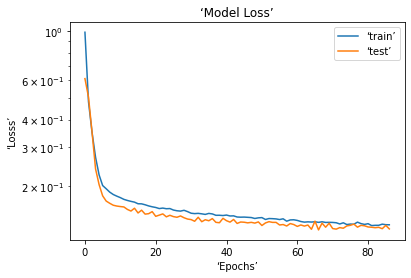

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('‘Model Loss’')
plt.ylabel('‘Losss’')
plt.xlabel('‘Epochs’')
plt.yscale("log")
plt.legend(['‘train’', '‘test’'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred = (y_pred > 0.85).astype(np.float32)

In [ ]:

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[ 417   56]
 [  36 4746]]
